<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/Week9/KERAS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
import numpy as np


In [ ]:
#Define the model achitecture
model = Sequential()
model.add(Dense(512, input_shape=(784,),activation='relu'))
model.add(Dropout(0.2))
#model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

#Softmax => logistic --> (out)/sum(output) -> Probabilities. --> 0 -->1

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount("/content/drive",force_remount=True)
path="/content/drive/My Drive/data/digit.csv"
df =pd.read_csv(path)
data=pd.read_csv(path,header=None)

Mounted at /content/drive


In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [ ]:
X=data.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, Y_train, Y_test=train_test_split(X[:,:-1],X[:,-1],test_size=0.2)

In [ ]:
Y_train

array([2, 2, 0, 4, 7, 3, 6, 5, 8, 3, 6, 2, 5, 0, 4, 7, 3, 9, 3, 9, 0, 8,
       8, 4, 1, 3, 0, 5, 5, 0, 0, 9, 3, 3, 9, 3, 6, 8, 8, 0, 2, 3, 5, 4,
       7, 6, 1, 7, 4, 6, 4, 9, 1, 3, 5, 9, 4, 9, 5, 0, 3, 5, 5, 0, 4, 6,
       6, 5, 6, 1, 0, 6, 9, 9, 8, 9, 9, 0, 1, 8, 4, 7, 3, 2, 1, 7, 7, 6,
       8, 0, 1, 3, 3, 1, 4, 2, 1, 6, 6, 5, 2, 4, 6, 7, 4, 7, 4, 9, 3, 0,
       9, 1, 3, 5, 8, 7, 2, 7, 9, 2, 6, 4, 1, 1, 6, 5, 2, 8, 1, 9, 5, 8,
       3, 7, 4, 6, 5, 3, 7, 4, 1, 7, 5, 4, 5, 4, 2, 6, 4, 2, 3, 7, 0, 0,
       0, 2, 1, 0, 0, 3, 8, 0, 9, 9, 8, 4, 4, 7, 4, 4, 5, 9, 6, 5, 9, 6,
       0, 9, 3, 3, 6, 1, 9, 4, 7, 5, 3, 0, 3, 5, 8, 5, 4, 0, 8, 8, 6, 3,
       9, 8, 4, 0, 1, 0, 8, 9, 8, 0, 9, 7, 2, 7, 8, 1, 9, 6, 5, 5, 2, 3,
       0, 4, 0, 1, 1, 3, 4, 2, 2, 5, 1, 2, 5, 7, 2, 0, 6, 5, 1, 7, 3, 4,
       6, 5, 1, 7, 6, 1, 8, 0, 6, 4, 9, 3, 7, 7, 2, 1, 9, 3, 1, 6, 6, 5,
       0, 9, 9, 2, 9, 4, 7, 2, 8, 8, 3, 3, 1, 7, 7, 3, 4, 2, 6, 2, 4, 2,
       7, 0, 0, 2, 7, 1, 1, 7, 8, 1, 9, 4, 8, 6, 7,

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
#Make the model learn
#MORE OPTIMIZER DETAILS here https://keras.io/optimizers/

In [ ]:
from keras.utils import to_categorical
y_train = keras.utils.to_categorical(Y_train, num_classes=10)
y_test = keras.utils.to_categorical(Y_test, num_classes=10)


In [ ]:
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [ ]:
print(y_test)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0.

In [ ]:
history=model.fit(X_train, y_train, epochs=200, verbose=1,validation_data=(X_test, y_test))


Epoch 1/200
13/13 [==============================] - 0s 15ms/step - loss: 0.2077 - accuracy: 0.9925 - val_loss: 41.8759 - val_accuracy: 0.8600
Epoch 2/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0081 - accuracy: 0.9975 - val_loss: 40.6777 - val_accuracy: 0.8300
Epoch 3/200
13/13 [==============================] - 0s 22ms/step - loss: 0.1756 - accuracy: 0.9975 - val_loss: 32.3121 - val_accuracy: 0.8600
Epoch 4/200
13/13 [==============================] - 0s 16ms/step - loss: 0.0778 - accuracy: 0.9950 - val_loss: 34.5108 - val_accuracy: 0.8300
Epoch 5/200
13/13 [==============================] - 0s 16ms/step - loss: 0.4138 - accuracy: 0.9950 - val_loss: 29.2117 - val_accuracy: 0.8600
Epoch 6/200
13/13 [==============================] - 0s 17ms/step - loss: 0.0488 - accuracy: 0.9975 - val_loss: 27.8965 - val_accuracy: 0.8700
Epoch 7/200
13/13 [==============================] - 0s 20ms/step - loss: 0.0366 - accuracy: 0.9950 - val_loss: 27.8168 - val_accuracy: 0.8600

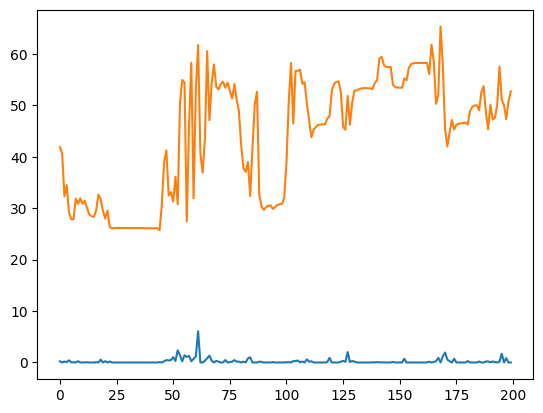

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

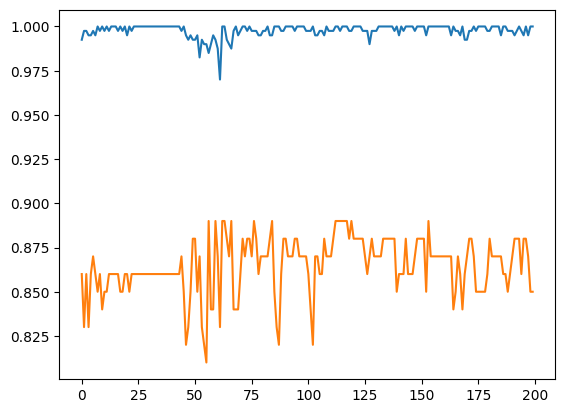

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])


In [ ]:
X_tests=X_test/255
X_trains=X_train/255

In [ ]:
history=model.fit(X_trains, y_train, epochs=200, verbose=1,validation_data=(X_tests, y_test))


Epoch 1/200
13/13 [==============================] - 0s 15ms/step - loss: 0.3530 - accuracy: 0.8750 - val_loss: 0.6627 - val_accuracy: 0.8300
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3532 - accuracy: 0.8850 - val_loss: 0.6751 - val_accuracy: 0.8300
Epoch 3/200
13/13 [==============================] - 0s 11ms/step - loss: 0.3183 - accuracy: 0.9075 - val_loss: 0.6818 - val_accuracy: 0.8300
Epoch 4/200
13/13 [==============================] - 0s 12ms/step - loss: 0.3321 - accuracy: 0.9050 - val_loss: 0.6764 - val_accuracy: 0.8200
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 0.3737 - accuracy: 0.8875 - val_loss: 0.6703 - val_accuracy: 0.8100
Epoch 6/200
13/13 [==============================] - 0s 13ms/step - loss: 0.3606 - accuracy: 0.8800 - val_loss: 0.6818 - val_accuracy: 0.8100
Epoch 7/200
13/13 [==============================] - 0s 11ms/step - loss: 0.3213 - accuracy: 0.9050 - val_loss: 0.6801 - val_accuracy: 0.8400
Epoch 

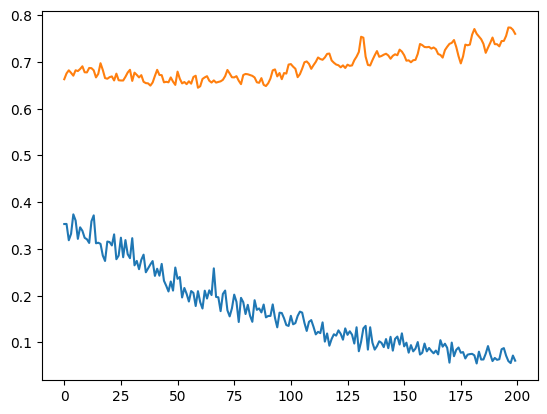

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_train)
Y_pred = np.argmax(y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_train, Y_pred))
print('Classification Report')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']
print(classification_report(Y_train, Y_pred, target_names=target_names))

13/13 [==============================] - 0s 3ms/step
Confusion Matrix
[[41  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 40  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 40]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        42
           4       1.00      1.00      1.00        40
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        44
           7       1.00      1.00      1.00        39
           8       1.00      1.00      1.00        37
           9       1.00      1.00   

In [ ]:

y_pred_test = model.predict(X_test)
Y_pred_test = np.argmax(y_pred_test, axis=1)
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred_test))
print('Classification Report')
target_names = ['0', '1', '2','3', '4', '5', '6', '7', '8', '9']
print(classification_report(Y_test, Y_pred_test, target_names=target_names))

4/4 [==============================] - 0s 4ms/step
Confusion Matrix
[[ 8  0  0  0  0  0  1  0  0  0]
 [ 0 10  0  1  0  0  0  0  0  0]
 [ 0  0  8  0  0  0  1  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  1]
 [ 0  0  0  0  8  0  2  0  0  0]
 [ 1  0  0  1  0  7  0  0  4  0]
 [ 0  0  0  0  0  0  6  0  0  0]
 [ 0  0  0  0  0  0  0 11  0  0]
 [ 0  1  1  1  0  0  0  0  9  1]
 [ 0  0  0  1  0  0  0  2  0  7]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.91      0.91      0.91        11
           2       0.89      0.89      0.89         9
           3       0.64      0.88      0.74         8
           4       1.00      0.80      0.89        10
           5       1.00      0.54      0.70        13
           6       0.60      1.00      0.75         6
           7       0.85      1.00      0.92        11
           8       0.69      0.69      0.69        13
           9       0.78      0.70     

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
